<h1 style='color: blue; font-size: 34px; font-weight: bold;'> Planejamento de Experimentos 
</h1>


# <font color='red' style='font-size: 30px;'>1.0 Introdução   </font>
<hr style='border: 2px solid red;'>




<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i> “Chamar um especialista em estatística depois que o experimento foi feito pode ser o mesmo que pedir para ele fazer um exame post-mortem. Talvez ele consiga dizer do que foi que o experimento morreu.”  </i>     
</p>    

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: right; text-indent: 0px;'>    
    <b>Sir Ronald Fisher</b>  

<hr>






# <font color='red' style='font-size: 30px;'> Introdução à análise de experimentos   </font>
<hr style='border: 2px solid red;'>

# <font color = 'purple'> Inserindo o experimento num Data Frame </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

## Importando as bibliotecas 

### Pandas

https://pandas.pydata.org/

In [75]:
import pandas as pd

### Numpy

http://www.numpy.org/

In [76]:
import numpy as np



<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
    <font color="red"> <b>Ensaios realizados na forma normalizada</b> 


<img width='800px' src='Figura_2.png'>

 
   
   
    


<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
<font color="MidnightBlue"> Construindo uma matriz representando todos os ensaios realizados:


In [77]:
ensaios = np.array([[-1,-1], [1,-1], [-1,1], [1,1]])
# quanto maior o nº de ensaios, maior o array. Isso pode incorrer em erros. Portanto, usamos a 
# biblioteca abaixo.

### pyDOE2

https://pypi.org/project/pyDOE2/

In [78]:
import pyDOE2 as doe

## Costruindo um planejamento fatorial de 2²


In [79]:
# O método ff2n manipula dois níveis (LS e LI) de planejamento fatorial e o nº de variáveis entre ().
ensaios = doe.ff2n(2)

In [80]:
#obtemos exatamente o mesmo array com o numpy de forma muito mais rápida e sem possibilidade de erros.
ensaios

array([[-1., -1.],
       [ 1., -1.],
       [-1.,  1.],
       [ 1.,  1.]])

## Incerindo o planejamento em um Data Frame

In [81]:
experimento = pd.DataFrame(ensaios, columns = ['Farinha', 'Chocolate'])

In [82]:
experimento

,Farinha,Chocolate
0,-1.0,-1.0
1,1.0,-1.0
2,-1.0,1.0
3,1.0,1.0


### Inserindo coluna com os resultados 

In [83]:
experimento['Porções'] = [19, 37, 24, 49]

In [84]:
experimento

,Farinha,Chocolate,Porções
0,-1.0,-1.0,19
1,1.0,-1.0,37
2,-1.0,1.0,24
3,1.0,1.0,49


<hr>
<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
    <font color="MidnightBlue"> <b>Conclusão:</b> Temos, por fim, nosso experimento representado por um <i>DataFrame</i> do Pandas. Usaremos este <i>DataFrame</i> para iniciarmos a análise do nosso experimento. 
    
<hr>   

# <font color = 'purple'> Analisando graficamente o experimento   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

###  Importando o Seaborn

https://seaborn.pydata.org

In [85]:
import seaborn as sns

In [86]:
# paletas -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r
sns.set_palette('terrain')

# estilo -> white, dark, whitegrid, darkgrid, ticks
sns.set_style('darkgrid')

### Para a farinha

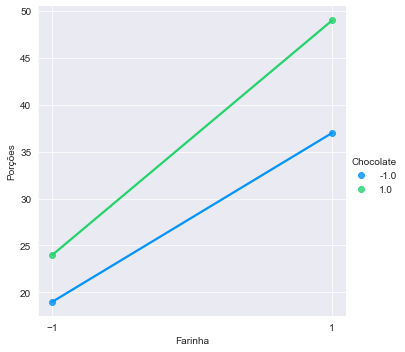

In [87]:
ax1 = sns.lmplot(data=experimento, x='Farinha', y='Porções', ci= None, hue = 'Chocolate')
# aqui estamos definindo o efeito de uma variável em relação à outra (farinha Vs chocolate). Quanto
# a inclinação da reta, maior o efeito da interação das variáveis.

# Aqui temos o efeito do farinha quando o chocolate está num nível inferior na linha azul e o efeito
# do farinha quando chocolate está num nível superior na linha verde.

# Notamos também que a quantidade de farinha é diretamente proporcional na produção de cupcakes, inde-
# pendente da quantidade de chocolate usada.

ax1.set(xticks = (-1,1))

### Para o chocolate

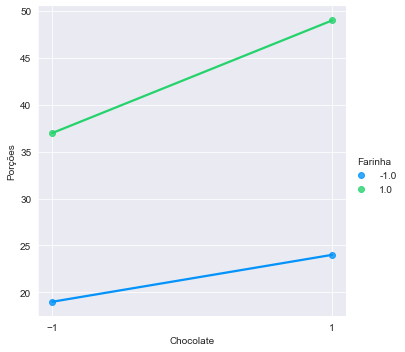

In [88]:
ax2 = sns.lmplot(data = experimento, x = 'Chocolate', y='Porções', ci=None, hue='Farinha')
ax2.set(xticks = (-1,1))

# Aqui temos o efeito do chocolate quando a farinha está num nível inferior na linha azul e o efeito
# do chocolate quando a farinha está num nível superior na linha verde.

# Notamos também que a quantidade de chocolate é diretamente proporcional na produção de cupcakes,
# independente da quantidade de farinha usada.

# Colocando os gráficos lado a lado, notamos que o efeito de variação da farina tem um impacto maior
# no número de cupcakes produzidos, logo concluímos que provavelmente a farinha tem uma maior importân-
# cia na definição do número de cupcakes que será produzido no final de uma receita.

# logo temos duas hipóteses formuladas: 1) Há um efeito de interação entre a farinha e o chocolate e 2)
# a farinha tem uma maior importância na quantidade de cupcakes produzidos.

# Agora precisamos confirmar essas hipóteses com um modelo.

# <font color = 'purple'> Ajustando o modelo estatístico </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

<hr>

<img width='800px' src='Figura_3.png'>

<p style='margin: 30px 30px;'> 

<hr>

Intercepto = média dos resultados dos ensaios.

Beta1 = Quão importante o efeito da farinha é na quantidade de cupcakes produzido.

Beta2 = Quão importante o efeito do chocolate é na quantidade de cupcakes produzido.

Beta1 + Beta2 = Efeitos isolados.

Beta3 = Quão importante é o efeito de interação para definir a quantidade de cupcakes produzidos.

Erro = Contabiliza a incapacidade do modelo que representar os dados experimentais.

### Bibliotecas  Stats Model


In [89]:
import statsmodels.api as sm

import statsmodels.formula.api as smf

### .

In [90]:
# O método pls irá montar os nossos dados no modelo estatístico. Para o StatsModels, o sinal de igual
# é representado pelo "~" e a interação por ":". O próprio método definirá o intercepto. 

modelo = smf.ols(data=experimento, formula='Porções ~ Farinha + Chocolate + Farinha:Chocolate')

In [91]:
modelo_ajustado = modelo.fit()

In [92]:
print(modelo_ajustado.summary())

                            OLS Regression Results                            
Dep. Variable:                Porções   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 12 Jan 2023   Prob (F-statistic):                nan
Time:                        10:02:22   Log-Likelihood:                 126.02
No. Observations:                   4   AIC:                            -244.0
Df Residuals:                       0   BIC:                            -246.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            32.2500        in

C:\Users\bruno\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\bruno\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1749: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\bruno\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1749: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\bruno\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1671: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
C:\Users\bruno\anaconda3\lib\site-packages\statsmodels\base\model.py:1512: RuntimeWarning: invalid value encountered in multiply
 

# <font color = 'purple'> Aumentando os Graus de liberdade  </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>



<p style='margin: 30px 30px;'>     
    


<hr>


<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
    <font color="red"> <b>Replicatas no centro</b>


<img width='800px' src='Figura_5.png'> 


<p style='margin: 30px 30px;'> 
    
    
 
    

    
<hr>    

In [93]:
# Nosso experimento não tem graus de liberdade suficientes para calcular o Erro. Isso fez com que
# não tivessemos resultados de intervalo de confiança e testes t e p-value. Então ou diminuimos os
# parâmetros do nosso experimento (e aí perdemos a possibilidade de analisar as interações já feitas), 
# ou realizamos mais ensaios (que é o que faremos).

# Os novos ensaios serão feitos exatamente no centro da ZE. Fazendo desta forma, seremos capazes de
# medir o grau de precisão das fornadas.

centro = np.array([
    [0,0,29],
    [0,0,30],
    [0,0,29],
    [0,0,30],
                  ])

In [94]:
centro_dataframe = pd.DataFrame(centro, columns = ['Farinha', 'Chocolate', 'Porções'], index = [4,5,6,7])

In [95]:
centro_dataframe

,Farinha,Chocolate,Porções
4,0,0,29
5,0,0,30
6,0,0,29
7,0,0,30


### .

In [96]:
experimento = experimento.append(centro_dataframe)

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_13004\292207606.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  experimento = experimento.append(centro_dataframe)


In [97]:
experimento

,Farinha,Chocolate,Porções
0,-1.0,-1.0,19
1,1.0,-1.0,37
2,-1.0,1.0,24
3,1.0,1.0,49
4,0.0,0.0,29
5,0.0,0.0,30
6,0.0,0.0,29
7,0.0,0.0,30


# <font color = 'purple'>  Análise de significância estatística   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

In [98]:
modelo = smf.ols(data = experimento, formula= 'Porções ~ Farinha + Chocolate + Farinha:Chocolate')

In [99]:
modelo_ajustado = modelo.fit()

In [100]:
print(modelo_ajustado.summary())

                            OLS Regression Results                            
Dep. Variable:                Porções   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     45.21
Date:                Thu, 12 Jan 2023   Prob (F-statistic):            0.00152
Time:                        10:02:22   Log-Likelihood:                -14.155
No. Observations:                   8   AIC:                             36.31
Df Residuals:                       4   BIC:                             36.63
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            30.8750      0.71

C:\Users\bruno\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<p style='margin: 200px 200px;'>    


<hr>


    
 <img width='400px' src='Figura_6.png'> 


<p style='margin: 30px 30px;'>    

<hr>


 <img width='600px' src='Figura_7.png'> 


<p style='margin: 30px 30px;'>        
    
    
 <hr>   
    

  
 <img width='600px' src='Figura_10.png'> 


<p style='margin: 30px 30px;'>       
  
<hr>        


# <font color = 'purple'> Teste de significância estatística usando o <b>t<b>    </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>





<hr>
<img width='600px' src='Figura_11.png'> 


<hr>
  <p style='margin: 30px 30px;'>     
<img width='900px' src='Figura_8.png'> 


<hr>



<p style='margin: 150px 150px;'>     
<img width='1000px' src='Figura_20.png'



<hr>
<p style='margin: 150px 150px;'>    

In [101]:
t_valores = modelo_ajustado.tvalues

In [102]:
t_valores

Intercept            43.494275
Farinha              10.708252
Chocolate             4.233495
Farinha:Chocolate     1.743204
dtype: float64

In [103]:
nome = t_valores.index.tolist()

In [104]:
nome

['Intercept', 'Farinha', 'Chocolate', 'Farinha:Chocolate']

### .

In [105]:
from scipy import stats

### .


In [106]:
distribuicao = stats.t(df = 4)

In [107]:
distribuicao.ppf(q = 1 - 0.025)

2.7764451051977987

In [108]:
limite = [distribuicao.ppf(q = 1 - 0.025)] * len(nome)

In [109]:
limite

[2.7764451051977987,
 2.7764451051977987,
 2.7764451051977987,
 2.7764451051977987]

### Plotando o gráfico 

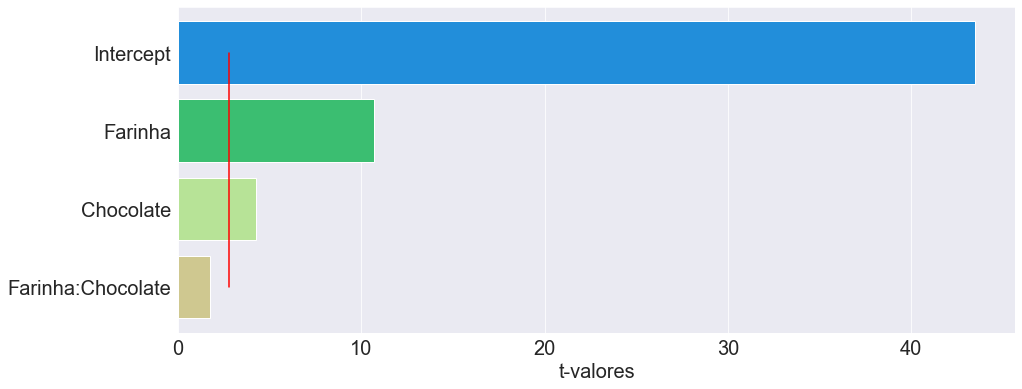

In [110]:
pareto = sns.barplot(x = t_valores, y=nome)
pareto.figure.set_size_inches(15,6)
pareto.tick_params(labelsize=20)
pareto.set_xlabel('t-valores', fontsize=20)

pareto.plot(limite, nome, 'r')

# <font color = 'purple'> Propondo um novo modelo   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>


<hr>

<img width='800px' src='Figura_3.png'>

<p style='margin: 30px 30px;'> 

<hr>

<p style='margin: 200px 200px;'>


<hr>

<img width='600px' src='Figura_9.png'> 

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>


<p style='margin: 30px 30px;'>

    
<hr>    


In [111]:
modelo_2 = smf.ols(data = experimento, formula = 'Porções ~ Farinha + Chocolate')

In [112]:
modelo_ajustado_2 = modelo_2.fit()

In [113]:
print(modelo_ajustado_2.summary())

                            OLS Regression Results                            
Dep. Variable:                Porções   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     47.09
Date:                Thu, 12 Jan 2023   Prob (F-statistic):           0.000571
Time:                        10:02:24   Log-Likelihood:                -16.416
No. Observations:                   8   AIC:                             38.83
Df Residuals:                       5   BIC:                             39.07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.8750      0.842     36.658      0.0

C:\Users\bruno\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<hr>

# <font color = 'purple'> Gráfico Padronizado de Pareto do novo modelo    </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>


In [114]:
t_valores = modelo_ajustado_2.tvalues

In [115]:
t_valores

Intercept    36.658022
Farinha       9.025173
Chocolate     3.568092
dtype: float64

In [116]:
nome = t_valores.index.tolist()

In [117]:
nome

['Intercept', 'Farinha', 'Chocolate']

### .

In [118]:
distribuicao = stats.t(df = 5)

In [119]:
distribuicao.ppf(q = 1 - 0.025)

2.5705818366147395

In [120]:
limite = [distribuicao.ppf(q = 1 - 0.025)] * len(nome)
limite

[2.5705818366147395, 2.5705818366147395, 2.5705818366147395]

### Plotando o gráfico

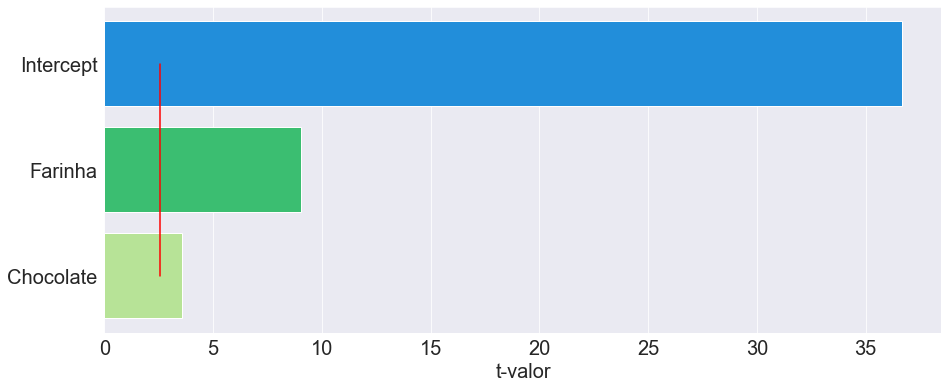

In [121]:
pareto = sns.barplot(x= t_valores, y= nome)
pareto.figure.set_size_inches(15,6)
pareto.tick_params(labelsize=20)
pareto.set_xlabel('t-valor', fontsize=20)

pareto.plot(limite, nome, 'r')

<font color='red' style='font-size: 30px;'> Preditos por observados  </font>
<hr style='border: 2px solid red;'>

In [122]:
observados = experimento['Porções']

In [123]:
observados

0    19
1    37
2    24
3    49
4    29
5    30
6    29
7    30
Name: Porções, dtype: int64

### .

In [124]:
preditos = modelo_ajustado_2.predict()

In [125]:
preditos

array([15.875, 37.375, 24.375, 45.875, 30.875, 30.875, 30.875, 30.875])

### .

In [126]:
import matplotlib.pyplot as plt

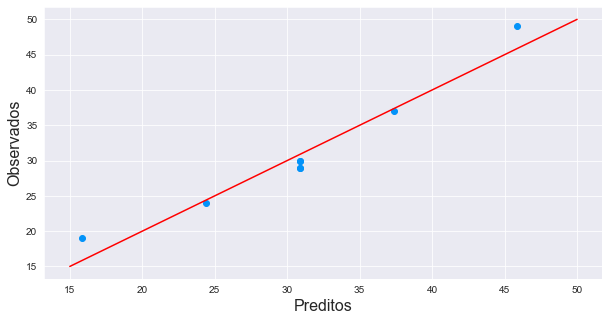

In [127]:
plt.figure(figsize = (10,5))

plt.xlabel('Preditos', fontsize = 16)
plt.ylabel('Observados', fontsize = 16)

#linha de guia

x = np.linspace(start=15, stop = 50, num = 10)

y= np.linspace(start=15, stop= 50, num=10)

plt.plot(x, y, 'r')

#comparação

plt.scatter(preditos, observados)


<hr>

In [128]:
print(modelo_ajustado_2.summary())

                            OLS Regression Results                            
Dep. Variable:                Porções   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     47.09
Date:                Thu, 12 Jan 2023   Prob (F-statistic):           0.000571
Time:                        10:02:25   Log-Likelihood:                -16.416
No. Observations:                   8   AIC:                             38.83
Df Residuals:                       5   BIC:                             39.07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.8750      0.842     36.658      0.0

C:\Users\bruno\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


### .

# <font color = 'purple'> Explorando o modelo   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

In [129]:
parametros = modelo_ajustado_2.params

In [130]:
parametros

Intercept    30.875
Farinha      10.750
Chocolate     4.250
dtype: float64

### .

### Definindo a função

In [131]:
def modelo_receita(x_f, x_c):
    
    #limite
    limite_normalizado = [-1,+1]
    limite_farinha = [0.5,1.5]
    limite_chocolate = [0.1,0.5]
    
    #converter
    x_f_convertido = np.interp(x_f,limite_farinha, limite_normalizado)
    x_c_convertido = np.interp(x_c,limite_chocolate, limite_normalizado)
    
    porcoes = parametros['Intercept'] + parametros['Farinha']*x_f_convertido + parametros['Chocolate']*x_c_convertido
    return round(porcoes)


In [132]:
modelo_receita(1,0.3)

31


<p style='margin: 150px 150px;'>


<hr>

<img width='700px' src='Figura_22.png'> 


<hr>

# <font color = 'purple'> Mapa de cores   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>


<p style='margin: 150px 150px;'>


<hr>

<img width='700px' src='Figura_23.jpg'> 

#### Fonte: National Centers for Environmental Prediction


<hr>



<p style='margin: 50px 50px;'>




<p style='margin: 150px 150px;'>


<hr>

<img width='600px' src='Figura_24.png'> 


<hr>



<p style='margin: 30px 30px;'>

In [133]:
x_farinha = np.linspace(start=0.5,stop=1.5,num=10)
x_farinha

array([0.5       , 0.61111111, 0.72222222, 0.83333333, 0.94444444,
       1.05555556, 1.16666667, 1.27777778, 1.38888889, 1.5       ])

In [134]:
x_chocolate = np.linspace(start=0.1,stop=0.5,num=10)
x_chocolate

array([0.1       , 0.14444444, 0.18888889, 0.23333333, 0.27777778,
       0.32222222, 0.36666667, 0.41111111, 0.45555556, 0.5       ])

### . 

In [135]:
pontos = []

for cont1 in x_farinha:
    temp = []
    for cont2 in x_chocolate:
        temp.append(modelo_receita(cont1,cont2))
    pontos.append(temp)

In [136]:
pontos

[[16, 17, 18, 19, 20, 21, 22, 22, 23, 24],
 [18, 19, 20, 21, 22, 23, 24, 25, 26, 27],
 [21, 22, 23, 23, 24, 25, 26, 27, 28, 29],
 [23, 24, 25, 26, 27, 28, 29, 30, 31, 32],
 [25, 26, 27, 28, 29, 30, 31, 32, 33, 34],
 [28, 29, 30, 31, 32, 33, 33, 34, 35, 36],
 [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
 [33, 34, 34, 35, 36, 37, 38, 39, 40, 41],
 [35, 36, 37, 38, 39, 40, 41, 42, 43, 43],
 [37, 38, 39, 40, 41, 42, 43, 44, 45, 46]]

### .

### Construindo a superfície de resposta

In [137]:
import matplotlib.cm as cm

https://matplotlib.org/users/colormaps.html

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_13004\3167095065.py:11: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar().set_label('Porções', fontsize=16)


<a list of 7 text.Text objects>

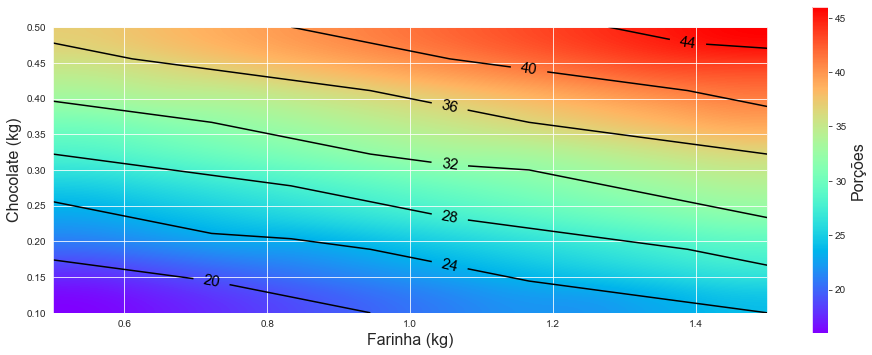

In [141]:
#base

plt.figure(figsize=(16,6))
plt.xlabel('Farinha (kg)', fontsize=16)
plt.ylabel('Chocolate (kg)', fontsize=16)

#Mapa de cores
mapa_cor = plt.imshow(pontos, origin = 'lower', cmap=cm.rainbow, interpolation='quadric',extent=(0.5,1.5,0.1,0.5))

#barra de cor
plt.colorbar().set_label('Porções', fontsize=16)

#linhas

linhas = plt.contour(x_farinha, x_chocolate, pontos, colors='k', linewidths=1.5)
plt.clabel(linhas, inline=True, fmt='%1.0f', fontsize=15.0, inline_spacing=10)